# Data Analytics
Notebook looking at general analytics of the data 

**"Narrowly defined, EDA and ESDA are focused on generating hypotheses, not testing them" (Anselin, 2019)**

Ideas:
- chloropleth maps to illustrate the PC1, PC2 of correlation between variables? 

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import sys
sys.path.append('../utils')
import direction_functions
import analysis_functions
import matplotlib.dates as mdates
import matplotlib.colors as cm

%matplotlib inline

In [3]:
gdf = gpd.read_file("../app_route_data/trajets_mtl_trajet_2017.shp", encoding='utf-8') # utf-8 needed to read french letters

In [6]:
# outlier removal
gdf = gdf.loc[gdf.distance_m >= 50]
gdf = gdf.loc[gdf.seconds >= 60]
gdf = gdf.loc[gdf.distance_m <= 100000]
gdf = gdf.loc[gdf.seconds <= 10800]
gdf = gdf.reset_index(drop=True)

In [4]:
above1000_mode = gdf.groupby(['mode']).count()['id_trip'][gdf.groupby(['mode']).count()['id_trip'] > 1000].index

In [5]:
# turn the data back into datetime
gdf['starttime'] = gdf['starttime'].apply(gpd.pd.to_datetime)
gdf['endtime'] = gdf['endtime'].apply(gpd.pd.to_datetime)
gdf['hour'] = gdf.starttime.apply(lambda tm: tm.hour)

In [7]:
one_modes = ["car", "cycling", "public_transport", "walking", "car_sharing", "taxi", "other", "not_available"]
one_pur = ['pick_up_a_person', 'work', 'shops', 'returning_home', 'health', 'leisure', 'education', 'other', 'cafe', 'not_available']

In [8]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,...,temporal_c,precip,temperatur,land_use,start_wgs,end_wgs,start_can,end_can,geometry,hour
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,...,0,0.000004,21.655905,None,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...,0
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,...,0,0.000000,20.182104,None,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...,2
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,...,0,0.000000,18.353766,None,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...,5
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,...,1,0.000000,18.353766,"['residential', 'employment', 'diversified act...",POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...,6
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,...,0,0.000000,18.353766,None,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...,6


## Purpose and Mode

total data points for 'cycling': 13595


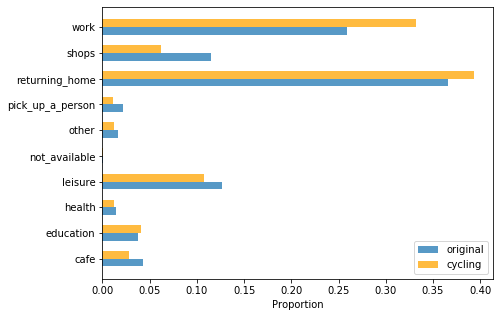

In [3]:
travel_mode = 'cycling'
col_order = ['cafe', 'education', 'health', 'leisure', 'not_available', 'other',\
         'pick_up_a_person', 'returning_home', 'shops', 'work']

grouped_purpose_all = gdf.groupby('purpose').count()['mode'] / gdf.groupby('purpose').count()['mode'].sum()
grouped_purpose_other = analysis_functions.group_purpose(gdf, travel_mode, col_order)

fig, ax = plt.subplots(1, figsize=(7,5))
ind = np.arange(len(grouped_purpose_all))
height = .3

ax.barh(y=ind, width=grouped_purpose_all, height=height, alpha=.75)
ax.barh(y=ind+height, width=grouped_purpose_other,height=height, color='orange', alpha=.75)
ax.set_yticks(ind + height / 2)
ax.set_yticklabels(col_order)
ax.set_xlabel("Proportion")

ax.legend(['original',travel_mode]);

In [4]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,start_wgs,end_wgs,start_can,end_can,geometry
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...


In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185285 entries, 0 to 185284
Data columns (total 15 columns):
id_trip       185285 non-null int64
mode          74218 non-null object
purpose       74218 non-null object
starttime     185285 non-null object
endtime       185285 non-null object
seconds       185285 non-null int64
distance_m    185285 non-null float64
direction     185285 non-null float64
magnitude     185285 non-null float64
carddir       185285 non-null object
start_wgs     185285 non-null object
end_wgs       185285 non-null object
start_can     185285 non-null object
end_can       185285 non-null object
geometry      185285 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.2+ MB


In [5]:
gdf.groupby(['mode','seconds']).count()[gdf.groupby('mode').count()['purpose'] > 100]

/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

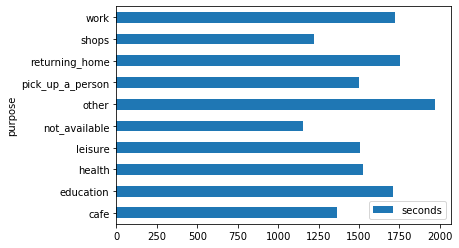

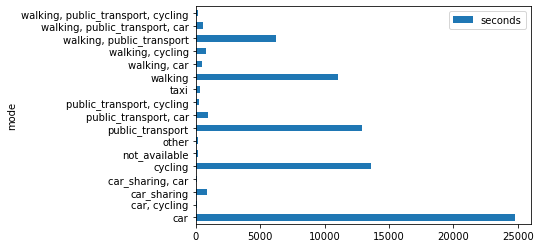

In [6]:
gdf.groupby(['purpose']).agg({'seconds':'mean'}).plot.barh()
gdf.groupby('mode').count()[gdf.groupby('mode').count()['purpose'] > 100].groupby(['mode']).agg({'seconds':'mean'}).plot.barh()

## bar chart of mode per hour

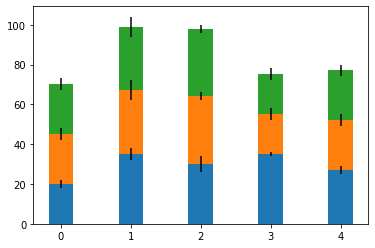

In [13]:
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars = np.add(menMeans, womenMeans).tolist()

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)
p2 = plt.bar(ind, enMeans, width,
             bottom=bars, yerr=womenStd)

In [11]:
mode_hours = {}
for hr in sorted(gdf.hour.unique()):
    one_mode = gdf.loc[(gdf.hour == hr) & (gdf['mode'].isin(one_modes))]
    mode_counts = ((one_mode['mode'].value_counts()  / len(one_mode))*100).to_dict()
    mode_hours[hr] = mode_counts

In [12]:
mode_hours[0]

{'car': 37.83783783783784,
 'cycling': 20.27027027027027,
 'public_transport': 19.256756756756758,
 'walking': 14.18918918918919,
 'taxi': 3.7162162162162162,
 'car_sharing': 3.3783783783783785,
 'other': 0.8445945945945946,
 'not_available': 0.5067567567567568}

In [13]:
def get_one_mode(mode_dicts, mode):
    ret_vals = []
    for ind in mode_dicts.keys():
        if mode in mode_dicts[ind]:
            ret_vals.append(mode_dicts[ind][mode])
        else:
            ret_vals.append(0)
    return ret_vals

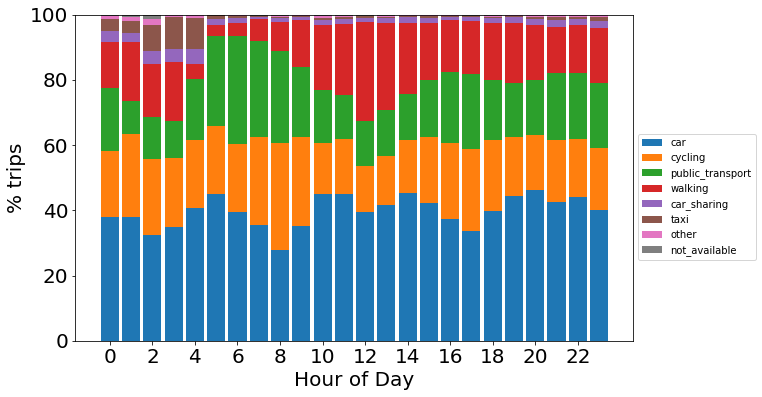

In [18]:
fig, ax = plt.subplots(1, figsize=(10,6))
ind = np.arange(24)    # the x locations for the groups
width = 0.85      # the width of the bars: can also be len(x) sequence
for i, md in enumerate(one_modes):
    vals = get_one_mode(mode_dicts=mode_hours, mode=md)
    if i == 0: 
        first_vals = vals
        ax.bar(ind, vals, width)
    elif i == 1:
        ax.bar(ind, vals, width, first_vals)
        first_vals = np.add(first_vals, vals).tolist()
    else:
        ax.bar(ind, vals, width, first_vals)
        first_vals = np.add(first_vals, vals).tolist()
    ax.legend(one_modes, bbox_to_anchor=(1, .65))
    plt.xticks(np.arange(0,24, 2), size=20)
    plt.yticks(size=20)
    ax.set_xlabel("Hour of Day", size=20)
    ax.set_ylabel("% trips", size=20)
#     plt.vlines(6.5,-10,110, color='r')
#     plt.vlines(18.5,-10,110, color='r')
#     plt.savefig("figures/hour_mode_bar.png", bbox_inches='tight')

## purpose

In [6]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,...,endrush,thrurush,lda_word,temporal_c,start_wgs,end_wgs,start_can,end_can,geometry,hour
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,...,0,0,None,0,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...,0
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,...,0,0,None,0,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...,2
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,...,1,0,None,0,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...,5
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,...,1,1,"Monday_6, pick_up_a_person",5,POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...,6
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,...,1,1,None,0,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...,6


In [24]:
pur_hours = {}
for hr in sorted(gdf.hour.unique()):
    one_pr = gdf.loc[(gdf.hour == hr) & (gdf['purpose'].isin(one_pur))]
    pur_counts = ((one_pr['purpose'].value_counts()  / len(one_pr))*100).to_dict()
    pur_hours[hr] = pur_counts

In [41]:
colorblind_pallette = ["#7b85d4","#f37738","#83c995","#d7369e","#c4c9d8","#859795","#e9d043","#ad5b50", "#ffa07a", "k"]

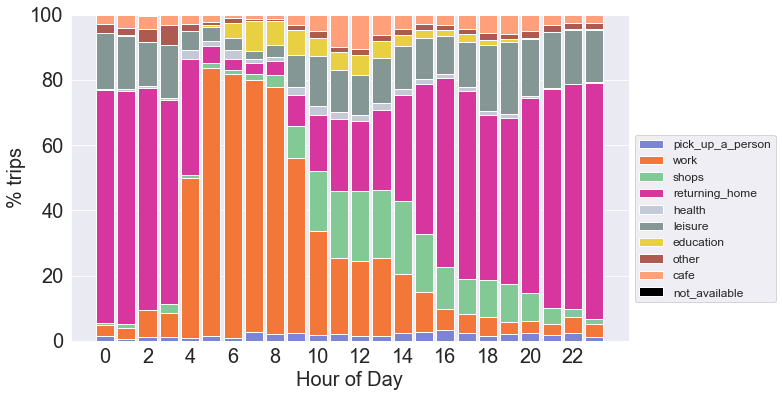

In [49]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, figsize=(10,6))
ind = np.arange(24)    # the x locations for the groups
width = 0.85      # the width of the bars: can also be len(x) sequence
for i, md, c in zip(range(len(one_pur)), one_pur, colorblind_pallette):
    vals = get_one_mode(mode_dicts=pur_hours, mode=md)
    if i == 0: 
        first_vals = vals
        ax.bar(ind, vals, width, color=c)
    elif i == 1:
        ax.bar(ind, vals, width, first_vals, color=c)
        first_vals = np.add(first_vals, vals).tolist()
    else:
        ax.bar(ind, vals, width, first_vals, color=c)
        first_vals = np.add(first_vals, vals).tolist()
    ax.legend(one_pur, bbox_to_anchor=(1, .65), fontsize=12)
    plt.xticks(np.arange(0,24, 2), size=20)
    plt.yticks(size=20)
    ax.set_xlabel("Hour of Day", size=20)
    ax.set_ylabel("% trips", size=20)
#     plt.vlines(x=5.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=9.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=14.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=18.5, ymin=0,ymax=100, color='blue', linestyles='--')
# plt.savefig("figures/hour_pur_bar.png", bbox_inches='tight')

In [40]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
month_fmt = mdates.DateFormatter("%M")

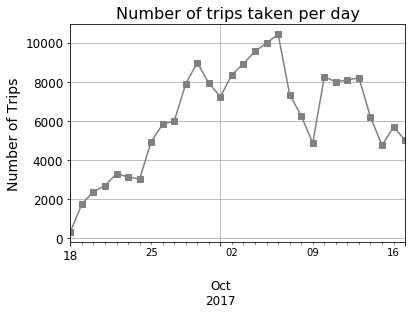

In [98]:
fig, ax = plt.subplots(1)
gdf.set_index('starttime').groupby(pd.Grouper(freq='d')).count()['id_trip'].plot(kind='line',ax=ax, color='grey', marker='s', grid=True)
ax.set_ylabel("Number of Trips", size=14)
ax.set_xlabel("", size=16)
plt.xticks(size=12);
plt.yticks(size=12);
plt.title("Number of trips taken per day", size=16)
# plt.savefig("figures/trips_per_day.png", bbox_inches='tight')

In [212]:
temp_to_purpose = gdf.set_index('starttime').groupby([pd.Grouper(freq='1d'), 'purpose']).agg({'temperatur':'mean', 'purpose':'count'})
temp_to_purpose.columns = ['temperature', 'count_purpose']
temp_to_purpose.reset_index(inplace=True)
temp_to_purpose.set_index('starttime', inplace=True)

temp_to_mode = gdf.loc[gdf['mode'].isin(above1000_mode)].set_index('starttime').groupby([pd.Grouper(freq='1d'), 'mode']).agg({'temperatur':'mean', 'mode':'count'})
temp_to_mode.columns = ['temperature', 'count_mode']
temp_to_mode.reset_index(inplace=True)
temp_to_mode.set_index('starttime', inplace=True)

In [214]:
temp_to_purpose.head()

,purpose,temperature,count_purpose
starttime,,,
2017-09-18 00:00:00-04:00,education,26.612205,2
2017-09-18 00:00:00-04:00,health,21.467712,2
2017-09-18 00:00:00-04:00,leisure,24.506164,16
2017-09-18 00:00:00-04:00,pick_up_a_person,22.369101,2
2017-09-18 00:00:00-04:00,returning_home,25.249733,67


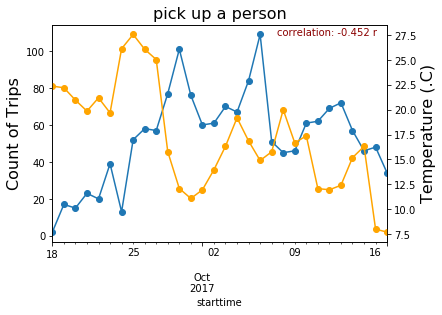

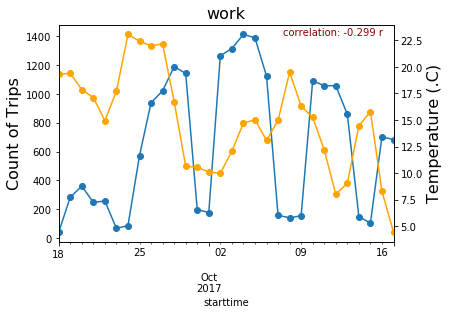

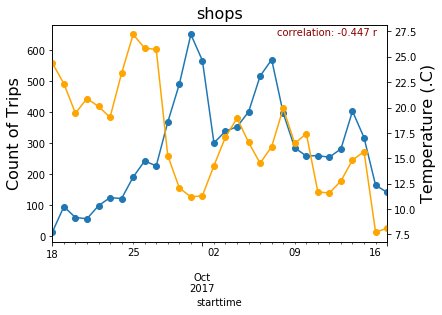

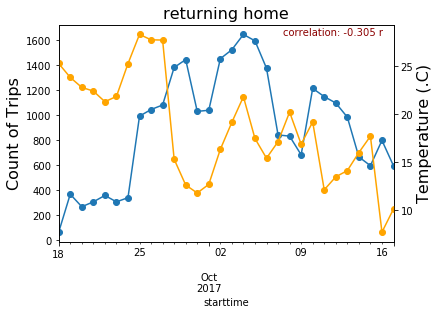

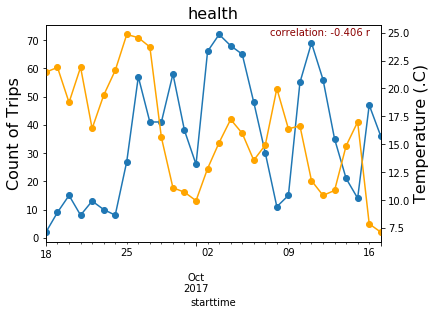

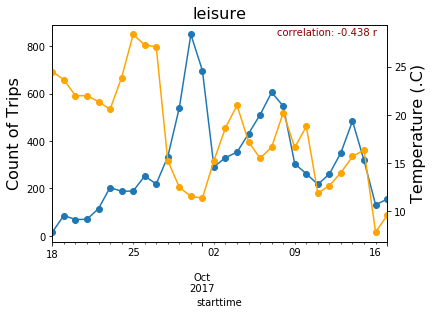

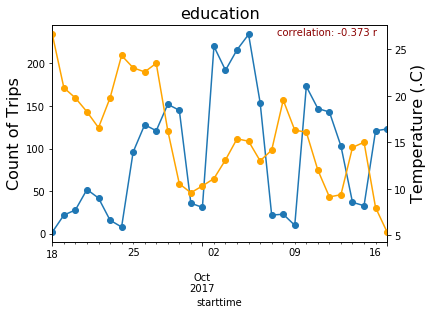

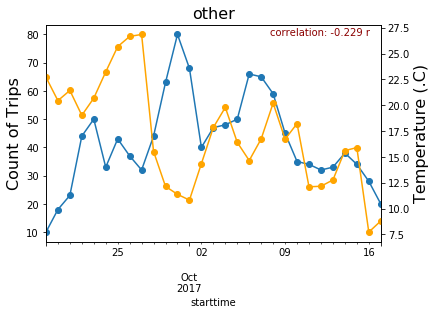

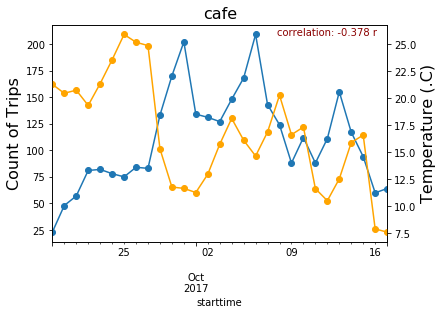

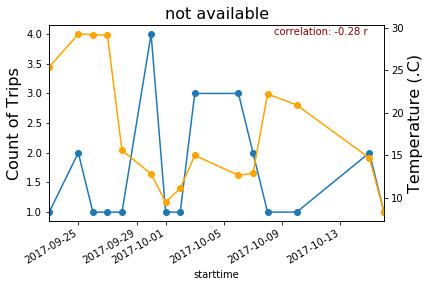

In [292]:
for u_pr in gdf.purpose.unique():
    if u_pr:
        fig, ax = plt.subplots(1)
        pr_df = temp_to_purpose.loc[temp_to_purpose['purpose'] == u_pr]
        pr_df['count_purpose'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_pr.replace('_'," ")), size=16)
        pr_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.annotate('correlation: {0} r'.format(str(round(pr_df['temperature'].corr(pr_df['count_purpose']), 3))), xy=(0.67, 0.95), xycoords='axes fraction', color='darkred')
#         plt.savefig("figures/{0}_temp_purpose.png".format(u_pr), bbox_inches='tight')
        plt.show()

In [ ]:
plt.text(s=md_df['temperature'].corr(md_df['count_mode']), x=10,y=2)

Text(2017-10-08, 25, 'correlation: -0.356 r')

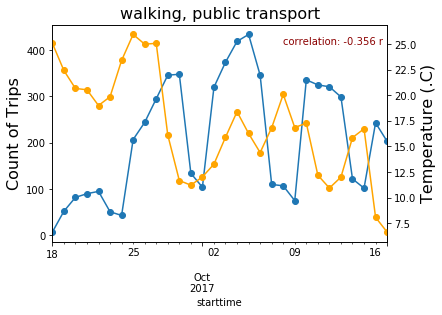

In [272]:
        fig, ax = plt.subplots(1)
        md_df = temp_to_mode.loc[temp_to_mode['mode'] == u_md]
        md_df['count_mode'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_md.replace('_'," ")), size=16)
        md_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.text(s='correlation: {0} r'.format(str(round(md_df['temperature'].corr(md_df['count_mode']), 3))), x=datetime.date(2017, 10, 8), y=25, color='darkred')
#         plt.text(s='{0}', x=datetime.date(2017, 10, 24), y=18)

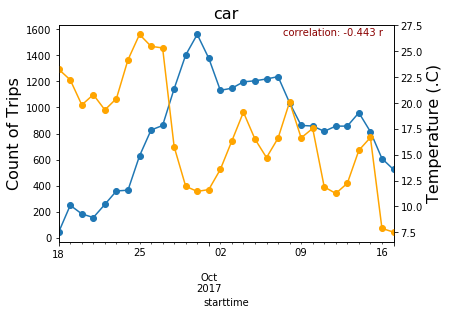

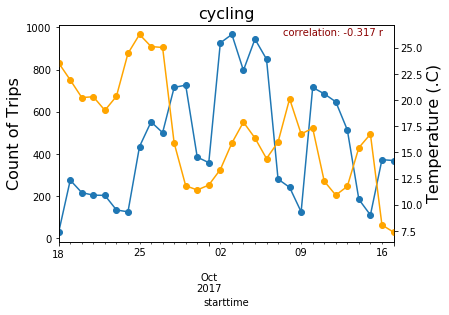

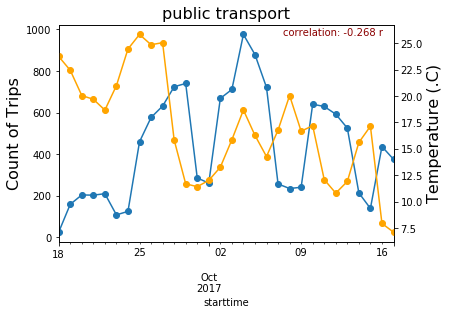

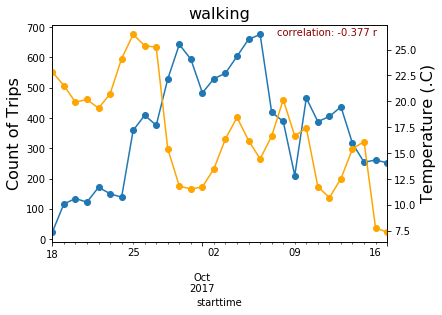

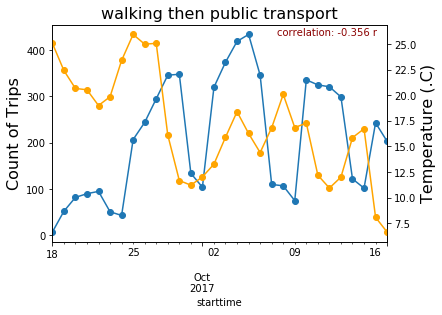

In [294]:
for u_md in above1000_mode:
    if u_md:
        fig, ax = plt.subplots(1)
        md_df = temp_to_mode.loc[temp_to_mode['mode'] == u_md]
        md_df['count_mode'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_md.replace('_'," ").replace(','," then")), size=16)
        md_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.annotate('correlation: {0} r'.format(str(round(md_df['temperature'].corr(md_df['count_mode']), 3))), xy=(0.67, 0.95), xycoords='axes fraction', color='darkred')
#         plt.savefig("figures/{0}_temp_mode.png".format(u_md), bbox_inches='tight')
        plt.show()